<a href="https://colab.research.google.com/github/kiera-dev/ACNH_Colab_SQL/blob/main/ACNH_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install duckdb squarify mpld3

In [ ]:
import duckdb, os
import pandas as pd
import altair as alt

#google drive paths
acnh_villagers_csv_path = "/content/drive/MyDrive/acnh_data/Villagers.csv"
acnh_housewares_csv_path = "/content/drive/MyDrive/acnh_data/Housewares.csv"
acnh_fish_csv_path = "/content/drive/MyDrive/acnh_data/Fish.csv"


#google drive connection + df creation
if os.path.exists(acnh_villagers_csv_path):

  print(f"Loading Villagers: {acnh_villagers_csv_path}")
  villagers_df = pd.read_csv(acnh_villagers_csv_path)

  print(f"Loading Furniture: {acnh_housewares_csv_path}")
  housewares_df = pd.read_csv(acnh_housewares_csv_path)

  print(f"Loading Fish: {acnh_fish_csv_path}")
  fish_df = pd.read_csv(acnh_fish_csv_path)

  dataframes=[fish_df, villagers_df, housewares_df]

#data cleaning
  print(f"Getting rid of spaces in column names")
  for df in dataframes:
    df = df.rename(columns=lambda x: x.lower().replace(' ', '_').replace('/','_'),inplace=True)


  print(f"Hiding some columns")
  columns_to_drop = ['icon_image', 'house_image', 'photo_image', 'subtype', 'image', 'pattern', 'pattern_title', 'critterpedia_image', 'furniture_image']
  for df in dataframes:
      for column in columns_to_drop:
        if column in df.columns:
          df.drop(column,axis=1,inplace=True)

  print(f"fishy things are happening")
  # for real i'm getting rid of some weird characters in the dataset
  def format_value(borked_value: str):
    # print(borked_value)
    value_array = borked_value.split("–")
    # print(value_array)
    try:
      value_array = [int(x) for x in value_array]
      # print(value_array)
      # print()
      return sum(value_array) / len(value_array)
    except Exception as e:
      print(e)

  fish_df["spawn_rates"] = fish_df.spawn_rates.apply(format_value)


#just in case gdrive doesn't connect
else:
  print(f"Derp not connecting")


villagers_df
housewares_df
fish_df

Loading Villagers: /content/drive/MyDrive/acnh_data/Villagers.csv
Loading Furniture: /content/drive/MyDrive/acnh_data/Housewares.csv
Loading Fish: /content/drive/MyDrive/acnh_data/Fish.csv
Getting rid of spaces in column names
Hiding some columns
fishy things are happening


,#,name,sell,where_how,shadow,catch_difficulty,vision,total_catches_to_unlock,spawn_rates,nh_jan,...,hha_base_points,hha_category,color_1,color_2,lighting_type,icon_filename,critterpedia_filename,furniture_filename,internal_id,unique_entry_id
0,56,anchovy,200,Sea,Small,Very Easy,Very Wide,0,3.5,4 AM – 9 PM,...,71,Pet,Blue,Red,No lighting,Fish81,FishAntyobi,FtrFishAntyobi,4201,LzuWkSQP55uEpRCP5
1,36,angelfish,3000,River,Small,Easy,Medium,20,3.5,NaN,...,71,Pet,Yellow,Black,Fluorescent,Fish30,FishAngelfish,FtrFishAngelfish,2247,XTCFCk2SiuY5YXLZ7
2,44,arapaima,10000,River,XX-Large,Very Hard,Narrow,50,1.0,NaN,...,71,Pet,Black,Blue,No lighting,Fish36,FishPiraruku,FtrFishPiraruku,2253,mZy4BES54bqwi97br
3,41,arowana,10000,River,Large,Very Hard,Medium,50,1.5,NaN,...,71,Pet,Yellow,Black,Fluorescent,Fish33,FishArowana,FtrFishArowana,2250,F68AvCaqddBJL7ZSN
4,58,barred knifejaw,5000,Sea,Medium,Hard,Medium,20,4.0,NaN,...,71,Pet,White,Black,Fluorescent,Fish47,FishIshidai,FtrFishIshidai,2265,X3R9SFSAaDzBF4fE3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,23,tilapia,800,River,Medium,Hard,Medium,0,8.0,NaN,...,71,Pet,Black,Black,Fluorescent,Fish76,FishThirapia,FtrFishThirapia,4190,as78rnkwY3ahrTkBY
76,66,tuna,7000,Pier,XX-Large,Very Hard,Narrow,50,2.0,All day,...,71,Pet,Blue,Black,Fluorescent,Fish57,FishMaguro,FtrFishMaguro,2274,4PnGXx9DSb866AeCM
77,75,whale shark,13000,Sea,X-Large w/Fin,Very Hard,Very Narrow,50,1.0,NaN,...,71,Pet,Black,Blue,No lighting,Fish72,FishJinbeezame,FtrFishJinbee,2282,r3RAtJsXENwnFvQh7
78,21,yellow perch,300,River,Medium,Medium,Narrow,0,8.5,All day,...,71,Pet,Yellow,Black,Fluorescent,Fish18,FishYellowparch,FtrFishYellowparch,2233,bLgE5dicZniF5zZDW


Animal Crossing Villager Personality Distribution - (Matplotlib)

Already some interesting results! Not much of a surprise at first, it turns out that the largest chunk of villagers have a "normal" personality (15.25%). What IS surprising is that there is an equal number of villagers are "lazy" (also 15.25%)! The "big sister" type is the rarest, making up only 6.29% of the population.

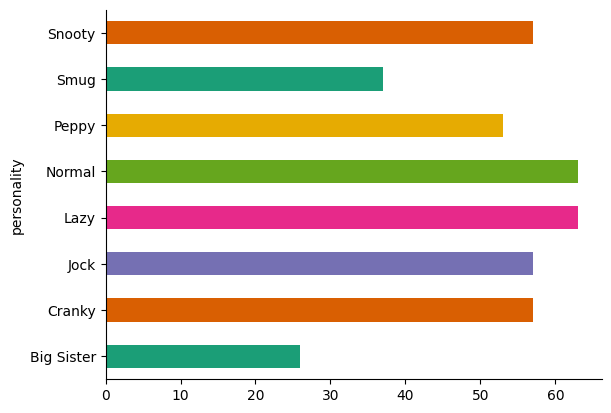

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
villagers_df.groupby('personality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Another way to view the data - Animal Crossing Villager Personality Distribution - Altiar

In [ ]:
#Query the stuff

personality_df = duckdb.sql("""
SELECT
  personality,
  COUNT(*) AS personality_count,
  COUNT(*) * 100.0 /
    (SELECT COUNT(personality) FROM villagers_df ) AS personality_percentage
FROM villagers_df
GROUP BY personality
ORDER BY personality_count ASC
""").df()

#Do the chart
alt.Chart(personality_df).mark_arc(innerRadius=50
).encode(
    theta="personality_percentage",
    color="personality:N",
    tooltip=["personality:N",
             "personality_percentage:Q",
             "personality_count:Q"],
).properties(
    width=300,
    height=300,
    title='Distribution of ACNH Villager Personalities'
)

alt.Chart(...)

I love cat villagers. What's their deal?

In [ ]:
duckdb.sql("""
SELECT
  name,
  gender,
  species,
  personality,
  catchphrase
FROM villagers_df
WHERE species = 'Cat'
""")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   name   │ gender  │ species │ personality │ catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha    │ Female  │ Cat     │ Snooty      │ me meow     │
│ Bob      │ Male    │ Cat     │ Lazy        │ pthhpth     │
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Kabuki   │ Male    │ Cat     │ Cranky      │ meooo-OH    │
│ Katt     │ Female  │ Cat     │ Big Sister  │ purrty      │
│ Kid Cat  │ Male    │ Cat     │ Jock        │ psst        │
│ Kiki     │ Female  │ Cat     │ Normal      │ kitty cat   │
│ Kitty    │ Female  │ Cat     │ Snooty      │ mrowrr      │
│ Lolly    │ Female  │ Cat     │ Normal      │ bonbon      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Mitzi    │ Female  │ Cat     │ Normal      │ mew         │
│ Moe      │ Male    │ Cat     │ Lazy        │ myawn       │
│ Monique  │ Female  │ C

In [ ]:
duckdb.sql("""
SELECT
  name,
  gender,
  species,
  personality,
  catchphrase
FROM villagers_df
WHERE species = 'Cat'
  AND personality = 'Peppy'
""")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   name   │ gender  │ species │ personality │ catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Rosie    │ Female  │ Cat     │ Peppy       │ silly       │
│ Tabby    │ Female  │ Cat     │ Peppy       │ me-WOW      │
│ Tangy    │ Female  │ Cat     │ Peppy       │ reeeeOWR    │
└──────────┴─────────┴─────────┴─────────────┴─────────────┘

In [ ]:
duckdb.sql("""
SELECT
  name,
  gender,
  species,
  personality,
  catchphrase
FROM villagers_df
WHERE species = 'Cat'
  AND name LIKE 'A%'
""")

┌─────────┬─────────┬─────────┬─────────────┬─────────────┐
│  name   │ gender  │ species │ personality │ catchphrase │
│ varchar │ varchar │ varchar │   varchar   │   varchar   │
├─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha   │ Female  │ Cat     │ Snooty      │ me meow     │
└─────────┴─────────┴─────────┴─────────────┴─────────────┘

What was the percentage of cranky villagers?

In [ ]:
duckdb.sql("""
SELECT
  COUNT(*) * 100.0 /
    (SELECT COUNT(*) FROM villagers_df ) AS cranky_percentage
FROM villagers_df
WHERE personality = 'Cranky'
""")

┌────────────────────┐
│ cranky_percentage  │
│       double       │
├────────────────────┤
│ 13.801452784503631 │
└────────────────────┘

Then what's the percentage of cranky cats?

In [ ]:
duckdb.sql("""
SELECT
  COUNT(*) * 100.0 /
    (SELECT COUNT(*)
    FROM villagers_df
    WHERE species = 'Cat')
  AS cat_cranky_percentage
FROM villagers_df
WHERE species = 'Cat'
  AND personality = 'Cranky'
""")

┌───────────────────────┐
│ cat_cranky_percentage │
│        double         │
├───────────────────────┤
│     8.695652173913043 │
└───────────────────────┘

What do the cat personality distribution sizes look like? Hm. Unlike in the overall population which leads with "normal" and "lazy", the two most common cat personality types are "snooty" and "peppy". "Big sister" and smug cats are the least common, which mirrors the overall population.

In [36]:
duckdb.sql("""
SELECT
  personality,
  COUNT(*) * 100.0 /
    (SELECT COUNT(personality)
    FROM villagers_df
    WHERE species = 'Cat')
  AS cat_personality_percentage
FROM villagers_df
WHERE species = 'Cat'
GROUP BY personality
ORDER BY cat_personality_percentage ASC
""")

┌─────────────┬────────────────────────────┐
│ personality │ cat_personality_percentage │
│   varchar   │           double           │
├─────────────┼────────────────────────────┤
│ Big Sister  │         4.3478260869565215 │
│ Smug        │         4.3478260869565215 │
│ Cranky      │          8.695652173913043 │
│ Lazy        │         13.043478260869565 │
│ Normal      │         13.043478260869565 │
│ Jock        │         13.043478260869565 │
│ Snooty      │          21.73913043478261 │
│ Peppy       │          21.73913043478261 │
└─────────────┴────────────────────────────┘

Let's look at species distribution among the villager population. There are 35 species in total. Cats are the most common species, consisting of 5.569% of the total population. Octopi and cows tie for the rarest species and make up <1% of the population.

In [ ]:
# @title
# duckdb.sql("""
# SELECT
#   COUNT(*) * 100.0 /
#     (SELECT
#       COUNT(*)
#     FROM villagers_df)
#     AS alligator_percentage
# FROM villagers_df
# WHERE species = 'Alligator'
# """)

duckdb.sql("""
SELECT
  species,
  COUNT(*) AS species_count,
  COUNT(*) * 100.0 /
    (SELECT COUNT(species) FROM villagers_df ) AS species_percentage
FROM villagers_df
GROUP BY species
ORDER BY species_count ASC
""").df()

,species,species_count,species_percentage
0,Octopus,4,0.968523
1,Cow,4,0.968523
2,Bull,6,1.452785
3,Hippo,7,1.694915
4,Lion,7,1.694915
5,Rhinoceros,7,1.694915
6,Tiger,7,1.694915
7,Anteater,8,1.937046
8,Alligator,8,1.937046
9,Kangaroo,8,1.937046


In [31]:
# @title
# import matplotlib.pyplot as plt
# import squarify
# import mpld3
# from mpld3 import plugins

# species_pop = duckdb.sql("""
# SELECT
#   species,
#   COUNT(*) AS species_count,
#   COUNT(*) * 100.0 /
#     (SELECT COUNT(species) FROM villagers_df ) AS species_percentage
# FROM villagers_df
# GROUP BY species
# ORDER BY species_count ASC
# """).df()

# #plot the map
# squarify.plot(sizes=species_pop['species_percentage'], label=species_pop['species'], alpha=0.8)

# # Add labels
# plt.axis('off')
# plt.title('Species Distribution')
# plt.show()

In [34]:
import plotly.express as px

species_pop = duckdb.sql("""
SELECT
  species,
  COUNT(*) AS species_count,
  COUNT(*) * 100.0 /
    (SELECT COUNT(species) FROM villagers_df ) AS species_percentage
FROM villagers_df
GROUP BY species
ORDER BY species_count ASC
""").df()

fig = px.treemap(species_pop, path=[px.Constant("all"), 'species'], values='species_percentage',
                  title='Species Distribution Across Total Population',
                  color='species_percentage', hover_data=['species_percentage'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=2.5)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<iframe width="600" height="450" src="https://lookerstudio.google.com/embed/reporting/e0653c80-34af-4ca7-84c9-b524e572b29c/page/sYioD" frameborder="0" style="border:0" allowfullscreen sandbox="allow-storage-access-by-user-activation allow-scripts allow-same-origin allow-popups allow-popups-to-escape-sandbox"></iframe>

<iframe width="600" height="450" src="https://lookerstudio.google.com/embed/reporting/e0653c80-34af-4ca7-84c9-b524e572b29c/page/sYioD" frameborder="0" style="border:0" allowfullscreen sandbox="allow-storage-access-by-user-activation allow-scripts allow-same-origin allow-popups allow-popups-to-escape-sandbox"></iframe>

<iframe width="600" height="450" src="https://lookerstudio.google.com/embed/reporting/e0653c80-34af-4ca7-84c9-b524e572b29c/page/sYioD" frameborder="0" style="border:0" allowfullscreen sandbox="allow-storage-access-by-user-activation allow-scripts allow-same-origin allow-popups allow-popups-to-escape-sandbox"></iframe>

In [ ]:
duckdb.sql("""
SELECT
  name,
  gender,
  species,
  personality,
  catchphrase
FROM villagers_df
WHERE species = 'Alligator'
""")

┌─────────┬─────────┬───────────┬─────────────┬─────────────┐
│  name   │ gender  │  species  │ personality │ catchphrase │
│ varchar │ varchar │  varchar  │   varchar   │   varchar   │
├─────────┼─────────┼───────────┼─────────────┼─────────────┤
│ Alfonso │ Male    │ Alligator │ Lazy        │ it'sa me    │
│ Alli    │ Female  │ Alligator │ Snooty      │ graaagh     │
│ Boots   │ Male    │ Alligator │ Jock        │ munchie     │
│ Del     │ Male    │ Alligator │ Cranky      │ gronk       │
│ Drago   │ Male    │ Alligator │ Lazy        │ burrrn      │
│ Gayle   │ Female  │ Alligator │ Normal      │ snacky      │
│ Roswell │ Male    │ Alligator │ Smug        │ spaaace     │
│ Sly     │ Male    │ Alligator │ Jock        │ hoo-rah     │
└─────────┴─────────┴───────────┴─────────────┴─────────────┘

In [ ]:
duckdb.sql("""
SELECT
  name,
  species,
  personality,
  catchphrase
FROM villagers_df
ORDER BY species ASC
""").df()

,name,species,personality,catchphrase
0,Del,Alligator,Cranky,gronk
1,Drago,Alligator,Lazy,burrrn
2,Alfonso,Alligator,Lazy,it'sa me
3,Gayle,Alligator,Normal,snacky
4,Alli,Alligator,Snooty,graaagh
...,...,...,...,...
408,Whitney,Wolf,Snooty,snappy
409,Wolfgang,Wolf,Cranky,snarrrl
410,Lobo,Wolf,Cranky,ah-rooooo
411,Fang,Wolf,Cranky,cha-chomp


In [ ]:
duckdb.sql("""
SELECT
  name,
  species,
  personality,
  catchphrase
FROM villagers_df
WHERE species = 'Wolf'
""")

┌──────────┬─────────┬─────────────┬─────────────┐
│   name   │ species │ personality │ catchphrase │
│ varchar  │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────────┼─────────────┤
│ Audie    │ Wolf    │ Peppy       │ foxtrot     │
│ Chief    │ Wolf    │ Cranky      │ harrumph    │
│ Dobie    │ Wolf    │ Cranky      │ ohmmm       │
│ Fang     │ Wolf    │ Cranky      │ cha-chomp   │
│ Freya    │ Wolf    │ Snooty      │ uff da      │
│ Kyle     │ Wolf    │ Smug        │ alpha       │
│ Lobo     │ Wolf    │ Cranky      │ ah-rooooo   │
│ Skye     │ Wolf    │ Normal      │ airmail     │
│ Vivian   │ Wolf    │ Snooty      │ piffle      │
│ Whitney  │ Wolf    │ Snooty      │ snappy      │
│ Wolfgang │ Wolf    │ Cranky      │ snarrrl     │
├──────────┴─────────┴─────────────┴─────────────┤
│ 11 rows                              4 columns │
└────────────────────────────────────────────────┘

In [ ]:
species_df = duckdb.sql("""
SELECT
  species,
  COUNT(*) AS species_count,
  COUNT(*) * 100.0 /
    (SELECT COUNT(species)
  FROM villagers_df ) AS species_percentage
FROM villagers_df
GROUP BY species
ORDER BY species_count ASC""").df()



┌────────────┬───────────────┬────────────────────┐
│  species   │ species_count │ species_percentage │
│  varchar   │     int64     │       double       │
├────────────┼───────────────┼────────────────────┤
│ Octopus    │             4 │ 0.9685230024213075 │
│ Cow        │             4 │ 0.9685230024213075 │
│ Bull       │             6 │ 1.4527845036319613 │
│ Hippo      │             7 │  1.694915254237288 │
│ Lion       │             7 │  1.694915254237288 │
│ Rhinoceros │             7 │  1.694915254237288 │
│ Tiger      │             7 │  1.694915254237288 │
│ Anteater   │             8 │  1.937046004842615 │
│ Alligator  │             8 │  1.937046004842615 │
│ Kangaroo   │             8 │  1.937046004842615 │
│   ·        │             · │          ·         │
│   ·        │             · │          ·         │
│   ·        │             · │          ·         │
│ Horse      │            15 │ 3.6319612590799033 │
│ Bear       │            15 │ 3.6319612590799033 │
│ Mouse     

In [ ]:
duckdb.sql("""
SELECT
  name,
  gender,
  species,
  personality,
  catchphrase,
  hobby
FROM villagers_df
WHERE species IN ('Gorilla','Rabbit')
  AND hobby = 'Fitness'

""")

┌─────────┬─────────┬─────────┬─────────────┬─────────────────┬─────────┐
│  name   │ gender  │ species │ personality │   catchphrase   │  hobby  │
│ varchar │ varchar │ varchar │   varchar   │     varchar     │ varchar │
├─────────┼─────────┼─────────┼─────────────┼─────────────────┼─────────┤
│ Al      │ Male    │ Gorilla │ Lazy        │ ayyyeee         │ Fitness │
│ Boone   │ Male    │ Gorilla │ Jock        │ baboom          │ Fitness │
│ Boyd    │ Male    │ Gorilla │ Cranky      │ uh-oh           │ Fitness │
│ Cesar   │ Male    │ Gorilla │ Cranky      │ highness        │ Fitness │
│ Hans    │ Male    │ Gorilla │ Smug        │ groovy          │ Fitness │
│ Louie   │ Male    │ Gorilla │ Jock        │ hoo hoo ha      │ Fitness │
│ Peewee  │ Male    │ Gorilla │ Cranky      │ li'l bitty baby │ Fitness │
│ Rocket  │ Female  │ Gorilla │ Big Sister  │ vroom           │ Fitness │
│ Violet  │ Female  │ Gorilla │ Snooty      │ sweetie         │ Fitness │
│ Genji   │ Male    │ Rabbit  │ Jock  

In [ ]:
duckdb.sql("""
SELECT
  name,
  species,
  furniture_name_list,
FROM villagers_df
WHERE name = 'Al'
  OR name = 'Lobo'
  OR name = 'Étoile'
  OR name = 'Marina'
""").df()

,name,species,furniture_name_list
0,Al,Gorilla,upright locker;weight bench;digital scale;port...
1,Lobo,Wolf,high-end stereo;chessboard;cooler box;ironwood...
2,Étoile,Sheep,wooden-block stereo;cute DIY table;Kiki & Lala...
3,Marina,Octopus,claw-foot tub;tankless toilet;cute bed;cute DI...


In [ ]:
duckdb.sql("""
SELECT
  name,
  species,
  furniture_name_list
FROM villagers_df
WHERE (furniture_name_list LIKE '%cute%'
  AND furniture_name_list LIKE '%music%')
  AND (name = 'Al'
  OR name = 'Lobo'
  OR name = 'Étoile'
  OR name = 'Marina')
""")

┌─────────┬─────────┬──────────────────────────────────────────────────────────────────────────────────────────────────┐
│  name   │ species │                                       furniture_name_list                                        │
│ varchar │ varchar │                                             varchar                                              │
├─────────┼─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Marina  │ Octopus │ claw-foot tub;tankless toilet;cute bed;cute DIY table;cute sofa;cute tea table;cute vanity;cut…  │
└─────────┴─────────┴──────────────────────────────────────────────────────────────────────────────────────────────────┘

In [ ]:
duckdb.sql("""
SELECT
  name,
  hha_series
FROM housewares_df
WHERE NOT hha_series = 'None'
""")

┌────────────────────┬─────────────────────────┐
│        name        │       hha_series        │
│      varchar       │         varchar         │
├────────────────────┼─────────────────────────┤
│ ? Block            │ Mario                   │
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│       ·            │    ·                    │
│       ·            │    ·                    │
│       ·            │    ·                    │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool

In [ ]:
duckdb.sql("SELECT * FROM villagers_df ")
print(villagers_df.columns)
print(villagers_df.describe())
print(villagers_df.shape)

Index(['name', 'species', 'gender', 'personality', 'hobby', 'birthday',
       'catchphrase', 'favorite_song', 'favorite_saying', 'style_1', 'style_2',
       'color_1', 'color_2', 'default_clothing', 'default_umbrella',
       'wallpaper', 'flooring', 'furniture_list', 'furniture_name_list',
       'diy_workbench', 'kitchen_equipment', 'version_added', 'name_color',
       'bubble_color', 'filename', 'unique_entry_id'],
      dtype='object')
       default_clothing
count        413.000000
mean        5394.784504
std         2465.296680
min         2401.000000
25%         3386.000000
50%         4406.000000
75%         7887.000000
max        13759.000000
(413, 26)


In [ ]:
duckdb.sql("""
SELECT DISTINCT name,
  interact,
FROM housewares_df
WHERE DIY = 'Yes'
""")

┌────────────────────────┬────────────────────┐
│          name          │      interact      │
│        varchar         │      varchar       │
├────────────────────────┼────────────────────┤
│ acoustic guitar        │ Musical Instrument │
│ angled signpost        │ No                 │
│ Aquarius urn           │ No                 │
│ asteroid               │ No                 │
│ bamboo doll            │ Yes                │
│ bamboo noodle slide    │ Yes                │
│ bamboo speaker         │ Music Player       │
│ bamboo stool           │ Chair              │
│ beekeeper's hive       │ No                 │
│ birdbath               │ No                 │
│    ·                   │ ·                  │
│    ·                   │ ·                  │
│    ·                   │ ·                  │
│ wooden mini table      │ No                 │
│ wooden simple bed      │ Bed                │
│ wooden stool           │ Chair              │
│ wooden table           │ No           

In [ ]:
duckdb.sql("""
SELECT
  DISTINCT name,
FROM housewares_df
WHERE DIY = 'Yes'
  AND interact = 'Yes'
""")

┌────────────────────────┐
│          name          │
│        varchar         │
├────────────────────────┤
│ gear tower             │
│ glowing-moss pond      │
│ glowing-moss statue    │
│ golden gear apparatus  │
│ illuminated present    │
│ illuminated snowflakes │
│ leaf campfire          │
│ bamboo noodle slide    │
│ big festive tree       │
│ bonfire                │
│    ·                   │
│    ·                   │
│    ·                   │
│ robot hero             │
│ rocking horse          │
│ sauna heater           │
│ space shuttle          │
│ spooky arch            │
│ spooky carriage        │
│ spooky scarecrow       │
│ tulip surprise box     │
│ Turkey Day hearth      │
│ water pump             │
├────────────────────────┤
│   57 rows (20 shown)   │
└────────────────────────┘

In [ ]:
duckdb.sql("""
SELECT
  name,
  variation,
  source,
  hha_concept_1,
  hha_concept_2,
  hha_category
FROM housewares_df
WHERE name = 'glowing-moss pond'
  AND interact = 'Yes'
""").df()

,name,variation,source,hha_concept_1,hha_concept_2,hha_category
0,glowing-moss pond,Turquoise,Crafting,fantasy,nature,None
1,glowing-moss pond,Green,Crafting,fantasy,nature,None
2,glowing-moss pond,Purple,Crafting,fantasy,nature,None


In [ ]:
duckdb.sql("""
SELECT
  name,
  species,
  personality,
  catchphrase,
  birthday,
  flooring,
  favorite_song
FROM villagers_df
WHERE name = 'Al'
  OR name = 'Audie'
  OR name ='Marina'
  OR name ='Renée'
  OR name = 'Flora'
  OR name = 'Lobo'
  OR name ='Bob'
  OR name = 'Mint'
  OR name = 'Snake'
  OR name ='Kidd'
ORDER BY personality ASC""")

┌─────────┬────────────┬─────────────┬─────────────┬──────────┬───────────────────────────┬───────────────┐
│  name   │  species   │ personality │ catchphrase │ birthday │         flooring          │ favorite_song │
│ varchar │  varchar   │   varchar   │   varchar   │ varchar  │          varchar          │    varchar    │
├─────────┼────────────┼─────────────┼─────────────┼──────────┼───────────────────────────┼───────────────┤
│ Renée   │ Rhinoceros │ Big Sister  │ yo yo yo    │ 5/28     │ tiger-print flooring      │ Surfin' K.K.  │
│ Lobo    │ Wolf       │ Cranky      │ ah-rooooo   │ 11/5     │ rosewood flooring         │ K.K. Rock     │
│ Snake   │ Rabbit     │ Jock        │ bunyip      │ 11/3     │ dirt flooring             │ King K.K.     │
│ Al      │ Gorilla    │ Lazy        │ ayyyeee     │ 10/18    │ green rubber flooring     │ Go K.K. Rider │
│ Bob     │ Cat        │ Lazy        │ pthhpth     │ 1/1      │ colorful puzzle flooring  │ Neapolitan    │
│ Marina  │ Octopus    │ Nor

In [ ]:
duckdb.sql("SELECT * FROM housewares_df ")
print(housewares_df.columns)
print(housewares_df.describe())
print(housewares_df.shape)

Index(['name', 'variation', 'body_title', 'diy', 'body_customize',
       'pattern_customize', 'pattern_customize_options', 'kit_cost',
       'kit_type', 'cyrus_customize_price', 'buy', 'sell', 'color_1',
       'color_2', 'size', 'surface', 'exchange_price', 'exchange_currency',
       'source', 'source_notes', 'season_event', 'season_event_exclusive',
       'hha_base_points', 'hha_concept_1', 'hha_concept_2', 'hha_series',
       'hha_set', 'hha_category', 'interact', 'tag', 'outdoor', 'speaker_type',
       'lighting_type', 'catalog', 'version_added', 'unlocked?', 'filename',
       'variant_id', 'internal_id', 'unique_entry_id'],
      dtype='object')
          kit_cost  cyrus_customize_price           sell  exchange_price  \
count  6474.000000            8322.000000    8537.000000     6514.000000   
mean      3.658326            2840.603220    5639.133654    18562.577832   
std       3.995444            2866.457073   17181.514964    61598.109220   
min       1.000000            

In [ ]:
duckdb.sql("""
SELECT
  name,
  hha_series
FROM housewares_df
WHERE NOT hha_series = 'None'""")

┌────────────────────┬─────────────────────────┐
│        name        │       hha_series        │
│      varchar       │         varchar         │
├────────────────────┼─────────────────────────┤
│ ? Block            │ Mario                   │
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bed        │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique bureau     │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│ antique chair      │ antique                 │
│       ·            │    ·                    │
│       ·            │    ·                    │
│       ·            │    ·                    │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool │ wooden block            │
│ wooden-block stool

In [ ]:
duckdb.sql("""
SELECT
  DISTINCT hha_series
FROM housewares_df""").df()

,hha_series
0,fruits
1,Cinnamoroll
2,cool
3,flowers
4,dreamy
5,Festivale
6,tree's bounty or leaves
7,imperial
8,plaza
9,iron


In [ ]:
duckdb.sql("""
SELECT
  DISTINCT name,
  hha_series
FROM housewares_df
WHERE hha_series ='cute'
  OR hha_series ='diner'""")

┌─────────────────────┬────────────┐
│        name         │ hha_series │
│       varchar       │  varchar   │
├─────────────────────┼────────────┤
│ cute bed            │ cute       │
│ cute DIY table      │ cute       │
│ cute tea table      │ cute       │
│ diner chair         │ diner      │
│ diner sofa          │ diner      │
│ cute chair          │ cute       │
│ cute floor lamp     │ cute       │
│ cute sofa           │ cute       │
│ cute vanity         │ cute       │
│ cute wardrobe       │ cute       │
│ diner counter chair │ diner      │
│ diner counter table │ diner      │
│ diner dining table  │ diner      │
│ diner mini table    │ diner      │
│ diner neon sign     │ diner      │
│ jukebox             │ diner      │
│ retro gas pump      │ diner      │
├─────────────────────┴────────────┤
│ 17 rows                2 columns │
└──────────────────────────────────┘

In [ ]:
duckdb.sql("""
SELECT
  DISTINCT hha_concept_1
FROM housewares_df""").df()

,hha_concept_1
0,party
1,facility
2,music
3,lab
4,city life
5,retro
6,arcade
7,hospital
8,local
9,sci-fi


In [ ]:
duckdb.sql("""
SELECT
  DISTINCT name,
  hha_concept_1,
  source,
  hha_set
FROM housewares_df
WHERE hha_concept_1 = 'café'
  OR hha_concept_1 = 'city life'
  OR hha_concept_1 = 'restaurant'""").df()

,name,hha_concept_1,source,hha_set
0,coffee plant,café,Brewster,None
1,counter chair,café,Nook's Cranny; HHP Office,None
2,counter table,café,Nook's Cranny; HHP Office,None
3,covered counter,café,Nook's Cranny; HHP Office,None
4,angled signpost,city life,Crafting,None
...,...,...,...,...
60,streetlamp,city life,Nook Miles Redemption,None
61,stroller,city life,Nook's Cranny; HHP Office,None
62,triangular topiary,city life,Nook Miles Redemption,None
63,vertical banner,city life,Nook's Cranny; HHP Office,None


In [ ]:
duckdb.sql("""
SELECT
  DISTINCT name,
  hha_concept_1
FROM housewares_df
WHERE source = 'Gulliver'
ORDER BY hha_concept_1 ASC""")

┌───────────────────┬───────────────┐
│       name        │ hha_concept_1 │
│      varchar      │    varchar    │
├───────────────────┼───────────────┤
│ Tower of Pisa     │ European      │
│ moai statue       │ ancient       │
│ sphinx            │ ancient       │
│ pyramid           │ ancient       │
│ Stonehenge        │ ancient       │
│ Statue of Liberty │ city life     │
│ pagoda            │ city life     │
│ South Pole        │ freezing cold │
│ katana            │ harmonious    │
└───────────────────┴───────────────┘

In [ ]:
duckdb.sql("""
SELECT
  DISTINCT name,
  hha_concept_1,
  source
FROM housewares_df
WHERE hha_concept_1 = 'harmonious'
  AND name NOT LIKE 'bamboo%'
ORDER BY source ASC""").df()

,name,hha_concept_1,source
0,hearth,harmonious,Crafting
1,senmaizuke barrel,harmonious,Crafting
2,raccoon figurine,harmonious,Crafting
3,pond stone,harmonious,Crafting
4,maple-leaf pond stone,harmonious,Crafting
5,pile of zen cushions,harmonious,Crafting
6,deer scare,harmonious,Crafting
7,stacked senmaizuke barrels,harmonious,Crafting
8,cherry-blossom-petal pile,harmonious,Crafting
9,cherry-blossom branches,harmonious,Crafting


# **Let's look at Fish! **

In [ ]:
duckdb.sql("SELECT * FROM fish_df ")
print(fish_df.columns)
print(fish_df.describe())
print(fish_df.shape)

Index(['#', 'name', 'sell', 'where_how', 'shadow', 'catch_difficulty',
       'vision', 'total_catches_to_unlock', 'spawn_rates', 'nh_jan', 'nh_feb',
       'nh_mar', 'nh_apr', 'nh_may', 'nh_jun', 'nh_jul', 'nh_aug', 'nh_sep',
       'nh_oct', 'nh_nov', 'nh_dec', 'sh_jan', 'sh_feb', 'sh_mar', 'sh_apr',
       'sh_may', 'sh_jun', 'sh_jul', 'sh_aug', 'sh_sep', 'sh_oct', 'sh_nov',
       'sh_dec', 'size', 'surface', 'description', 'catch_phrase',
       'hha_base_points', 'hha_category', 'color_1', 'color_2',
       'lighting_type', 'icon_filename', 'critterpedia_filename',
       'furniture_filename', 'internal_id', 'unique_entry_id'],
      dtype='object')
             #          sell  total_catches_to_unlock  spawn_rates  \
count  80.0000     80.000000                80.000000    80.000000   
mean   40.5000   3745.000000                19.250000     4.806250   
std    23.2379   4517.151561                27.364164     4.357079   
min     1.0000    100.000000                 0.000000   

In [ ]:
duckdb.sql("""
SELECT
  DISTINCT name,
  where_how,
  total_catches_to_unlock,
  nh_jan
FROM fish_df
WHERE nh_jan <> 'NULL'""").df()

,name,where_how,total_catches_to_unlock,nh_jan
0,anchovy,Sea,0,4 AM – 9 PM
1,barreleye,Sea,100,9 PM – 4 AM
2,black bass,River,0,All day
3,blowfish,Sea,20,9 PM – 4 AM
4,coelacanth,Sea (rainy days),100,All day
5,dab,Sea,0,All day
6,dace,River,0,4 PM – 9 AM
7,oarfish,Sea,50,All day
8,olive flounder,Sea,0,All day
9,pop-eyed goldfish,Pond,0,9 AM – 4 PM


In [ ]:
duckdb.sql("""
SELECT
  name,
  sell
FROM fish_df
ORDER BY sell DESC""")

┌───────────────────┬───────┐
│       name        │ sell  │
│      varchar      │ int64 │
├───────────────────┼───────┤
│ barreleye         │ 15000 │
│ coelacanth        │ 15000 │
│ dorado            │ 15000 │
│ golden trout      │ 15000 │
│ great white shark │ 15000 │
│ stringfish        │ 15000 │
│ whale shark       │ 13000 │
│ saw shark         │ 12000 │
│ arapaima          │ 10000 │
│ arowana           │ 10000 │
│    ·              │    ·  │
│    ·              │    ·  │
│    ·              │    ·  │
│ puffer fish       │   250 │
│ dace              │   240 │
│ anchovy           │   200 │
│ crawfish          │   200 │
│ pale chub         │   200 │
│ bluegill          │   180 │
│ crucian carp      │   160 │
│ horse mackerel    │   150 │
│ frog              │   120 │
│ tadpole           │   100 │
├───────────────────┴───────┤
│    80 rows (20 shown)     │
└───────────────────────────┘

In [ ]:
duckdb.sql("""
SELECT
  name,
  spawn_rates,
  where_how
FROM fish_df
ORDER BY spawn_rates DESC""")

┌──────────────────┬─────────────┬──────────────────┐
│       name       │ spawn_rates │    where_how     │
│     varchar      │   double    │     varchar      │
├──────────────────┼─────────────┼──────────────────┤
│ salmon           │        20.0 │ River (mouth)    │
│ pond smelt       │        19.0 │ River            │
│ horse mackerel   │        17.5 │ Sea              │
│ bitterling       │        14.5 │ River            │
│ sea bass         │        14.5 │ Sea              │
│ loach            │        14.0 │ River            │
│ dab              │        12.5 │ Sea              │
│ sea butterfly    │        10.5 │ Sea              │
│ squid            │         8.5 │ Sea              │
│ yellow perch     │         8.5 │ River            │
│      ·           │          ·  │   ·              │
│      ·           │          ·  │   ·              │
│      ·           │          ·  │   ·              │
│ golden trout     │         1.0 │ River (clifftop) │
│ hammerhead shark │        

In [ ]:
duckdb.sql("""
SELECT
  name,
  nh_jan,
  CASE
    WHEN nh_jan IS NOT NULL
      THEN 'Yes'
    WHEN nh_jan IS NULL
      THEN 'No'
  END AS available_in_jan
FROM fish_df """)

┌──────────────────┬─────────────┬──────────────────┐
│       name       │   nh_jan    │ available_in_jan │
│     varchar      │   varchar   │     varchar      │
├──────────────────┼─────────────┼──────────────────┤
│ anchovy          │ 4 AM – 9 PM │ Yes              │
│ angelfish        │ NULL        │ No               │
│ arapaima         │ NULL        │ No               │
│ arowana          │ NULL        │ No               │
│ barred knifejaw  │ NULL        │ No               │
│ barreleye        │ 9 PM – 4 AM │ Yes              │
│ betta            │ NULL        │ No               │
│ bitterling       │ All day     │ Yes              │
│ black bass       │ All day     │ Yes              │
│ blowfish         │ 9 PM – 4 AM │ Yes              │
│    ·             │    ·        │  ·               │
│    ·             │    ·        │  ·               │
│    ·             │    ·        │  ·               │
│ sturgeon         │ All day     │ Yes              │
│ suckerfish       │ NULL   

In [ ]:
duckdb.sql("""
  SELECT
    name,
    total_catches_to_unlock,
    sell,
    where_how,
    spawn_rates,
    CASE
      WHEN total_catches_to_unlock > 40
        THEN false
      WHEN where_how = 'Pier'
        THEN false
      WHEN sell < 3000
        THEN false
      ELSE true
    END AS good_fish
  FROM fish_df
  WHERE good_fish = true""").df()

,name,total_catches_to_unlock,sell,where_how,spawn_rates,good_fish
0,angelfish,20,3000,River,3.5,True
1,barred knifejaw,20,5000,Sea,4.0,True
2,blowfish,20,5000,Sea,5.0,True
3,char,20,3800,River (clifftop),2.5,True
4,hammerhead shark,20,8000,Sea,1.0,True
5,koi,20,4000,Pond,2.5,True
6,ocean sunfish,20,4000,Sea,1.0,True
7,ranchu goldfish,20,4500,Pond,1.5,True
8,ray,20,3000,Sea,2.0,True
9,red snapper,0,3000,Sea,6.0,True


In [ ]:
duckdb.sql("""
  SELECT
    name,
    total_catches_to_unlock,
    sell,
    where_how,
    spawn_rates,
    CASE
      WHEN spawn_rates < 3
        THEN false
      WHEN total_catches_to_unlock > 40
        THEN false
      WHEN where_how = 'Pier'
        THEN false
      WHEN sell < 3000
        THEN false
      ELSE true
    END AS good_fish
  FROM fish_df
  WHERE good_fish = true""").df()

,name,total_catches_to_unlock,sell,where_how,spawn_rates,good_fish
0,angelfish,20,3000,River,3.5,True
1,barred knifejaw,20,5000,Sea,4.0,True
2,blowfish,20,5000,Sea,5.0,True
3,red snapper,0,3000,Sea,6.0,True
4,soft-shelled turtle,20,3750,River,4.0,True


In [ ]:
duckdb.sql("""
SELECT
  CAST(total_catches_to_unlock AS STRING)
FROM fish_df""")

┌──────────────────────────────────────────┐
│ CAST(total_catches_to_unlock AS VARCHAR) │
│                 varchar                  │
├──────────────────────────────────────────┤
│ 0                                        │
│ 20                                       │
│ 50                                       │
│ 50                                       │
│ 20                                       │
│ 100                                      │
│ 20                                       │
│ 0                                        │
│ 0                                        │
│ 20                                       │
│ ·                                        │
│ ·                                        │
│ ·                                        │
│ 20                                       │
│ 20                                       │
│ 0                                        │
│ 0                                        │
│ 0                                        │
│ 0       

In [ ]:
duckdb.sql("""
SELECT
  (MAX(spawn_rates) + MIN(spawn_rates)) / 2 AS median_spawn,
  AVG(spawn_rates) AS avg_spawn,
FROM fish_df
""")

┌──────────────┬───────────┐
│ median_spawn │ avg_spawn │
│    double    │  double   │
├──────────────┼───────────┤
│         10.5 │   4.80625 │
└──────────────┴───────────┘

In [ ]:
duckdb.sql("""
  SELECT
    name,
    total_catches_to_unlock,
    sell,
    where_how,
    spawn_rates,
    CASE
      WHEN spawn_rates < 3
        THEN false
      WHEN sell < 3000
        THEN false
      ELSE true
    END AS good_fish
  FROM fish_df
  WHERE good_fish = true
  AND nh_feb <> 'None'
  """).df()

,name,total_catches_to_unlock,sell,where_how,spawn_rates,good_fish
0,blowfish,20,5000,Sea,5.0,True
1,red snapper,0,3000,Sea,6.0,True


In [ ]:
duckdb.sql("""
  SELECT
    name,
    total_catches_to_unlock,
    sell,
    where_how,
    spawn_rates,
    nh_feb
  FROM fish_df
  WHERE nh_feb <> 'None'
  """).df()

,name,total_catches_to_unlock,sell,where_how,spawn_rates,nh_feb
0,anchovy,0,200,Sea,3.5,4 AM – 9 PM
1,barreleye,100,15000,Sea,1.0,9 PM – 4 AM
2,bitterling,0,900,River,14.5,All day
3,black bass,0,400,River,8.0,All day
4,blowfish,20,5000,Sea,5.0,9 PM – 4 AM
5,blue marlin,50,10000,Pier,1.5,All day
6,bluegill,0,180,River,8.0,9 AM – 4 PM
7,carp,0,300,Pond,6.0,All day
8,coelacanth,100,15000,Sea (rainy days),1.5,All day
9,crucian carp,0,160,River,8.0,All day


In [ ]:
duckdb.sql("""
SELECT
  DISTINCT name,
  source,
  hha_concept_1,
  hha_concept_2,
  hha_category
FROM housewares_df
""").df()

,name,source,hha_concept_1,hha_concept_2,hha_category
0,? Block,Nook Shopping Promotion,fancy,child's room,None
1,2021 celebratory arch,Nook Shopping Seasonal,party,None,None
2,ABD,Nook Miles Redemption,facility,city life,None
3,alto saxophone,Nook's Cranny,music,None,MusicalInstrument
4,antique bed,Nook's Cranny,retro,expensive,None
...,...,...,...,...,...
953,yacht,Nook Shopping Daily Selection; HHP Office,ocean,None,None
954,zen bench,Nook's Cranny; HHP Office,harmonious,garden,None
955,zen low table,Nook's Cranny; HHP Office,harmonious,living room,None
956,zen lowboard,Nook's Cranny; HHP Office,harmonious,living room,None
